<a href="https://colab.research.google.com/github/daniilomendes/An-lise-explorat-ria/blob/main/LimpezaeTratamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Limpeza e Tratamendo de dados

Instituição financeira

Objetivo é criar um modelo de Churn para um problema de marketing prevendo quais clientes que deixaram a empresa e criar uma estrategia para evitar isso

In [ ]:
#importando bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts

In [ ]:
#importando base de dados
dataset = pd.read_csv("/content/drive/MyDrive/FormaçãoCD2/10.Prática em Python/dados/Churn.csv", sep = ";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
#verificando o tamanho da base de dados
dataset.shape

(999, 12)

In [ ]:
#organizando as colunas
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartaoCredito", "Ativo", "Salario", "Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


#Analise Exploratoria

Identificando os erros na base de dados

In [ ]:
#explorar dados categoricos
#Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

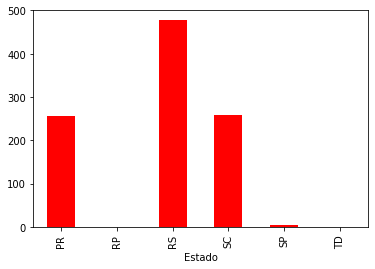

In [ ]:
#grafico de barras
agrupado.plot.bar(color = 'red')

In [ ]:
#Genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

#agrupado.plot.bar(color = 'red')

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [ ]:
#explorar colunas numericas
#Score

dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Score')

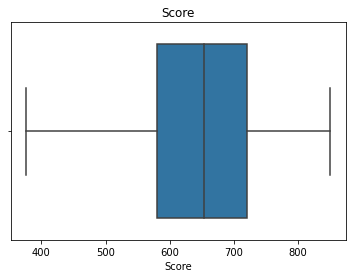

In [ ]:
srn.boxplot(dataset['Score']).set_title('Score')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score')

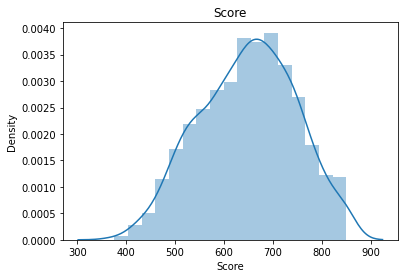

In [ ]:
srn.distplot(dataset['Score']).set_title('Score')

In [ ]:
#Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Idade')

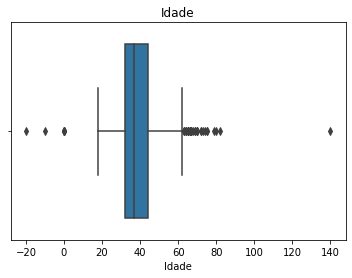

In [ ]:
srn.boxplot(dataset['Idade']).set_title('Idade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

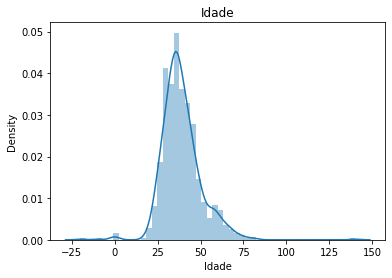

In [ ]:
srn.distplot(dataset['Idade']).set_title('Idade')

In [ ]:
#Saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Saldo')

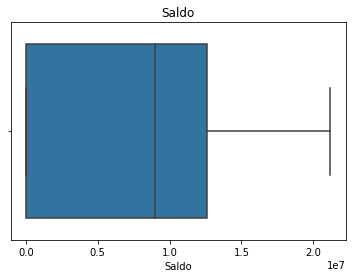

In [ ]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saldo')

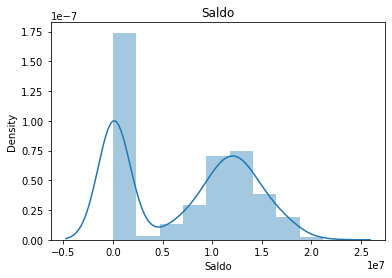

In [ ]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

In [ ]:
#Salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Salario')

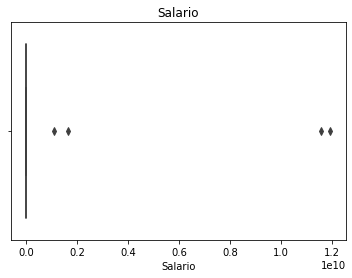

In [ ]:
srn.boxplot(dataset['Salario']).set_title('Salario')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salario')

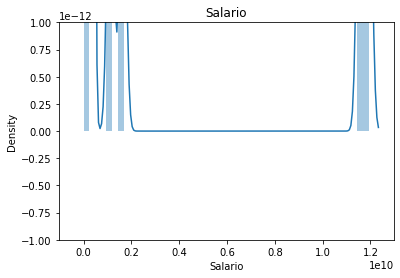

In [ ]:
srn.distplot(dataset['Salario']).set_title('Salario')

In [ ]:
#contando valores NAN(valores não disponiveis(não preenchidas))
#Genero e Salario
dataset.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              8
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             7
Saiu                0
dtype: int64

#Tratando os Dados

Resolvendo os erros encontrados na analise exploratoria

In [ ]:
#Salarios
#remover NA's e substituir pela mediana
dataset['Salario'].describe()

#calculando o valor da mediana
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [ ]:
#substituindo NA's pela mediana
dataset['Salario'].fillna(mediana, inplace = True)

#verificando se os valores NA's não existem mais
dataset['Salario'].isnull().sum()

0

In [ ]:
#Genero
#falta de padronização
agrupado = dataset.groupby(['Genero']).size()
agrupado

#total de NA's
dataset['Genero'].isnull().sum()

8

In [ ]:
#preencher NA's com a moda(Masculino)
dataset['Genero'].fillna('Masculino', inplace = True)

#verificando se existem NA's
dataset['Genero'].isnull().sum()

0

In [ ]:
#padroniza de acordo com o dominio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = "Feminino"

#visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [ ]:
#idades fora de dominio
dataset['Idade'].describe()

#visualizar
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [ ]:
#calcular a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [ ]:
#substituir pela mediana
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

#verificando se ainda existe idades fora do dominio
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [ ]:
#dados duplicados, buscamos pelo id
dataset[dataset.duplicated(['Id'], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
#excluir pelo Id
dataset.drop_duplicates(subset = "Id", keep = 'first', inplace = True)
#verificar se existe duplicados
dataset[dataset.duplicated(['Id'], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [ ]:
#estado fora do dominio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [ ]:
#atribuir a moda(RS)
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

#verificar resultado
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [ ]:
#outliers() em salario, vamos considerar 2 desvios padrão
desviopadrao = sts.stdev(dataset['Salario'])
desviopadrao

528988918.4679201

In [ ]:
#definir padrão como maior que 2 desvios padrão
#checar se algum atende o criterio
dataset.loc[dataset['Salario'] >= 2 * desviopadrao]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [ ]:
#atualizar os salarios para a mediana
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [ ]:
#atribuir a mediana aos salarios fora do desvio
dataset.loc[dataset['Salario'] >= 2 * desviopadrao, 'Salario'] = mediana

#verificar se ainda existe algum salario fora do desvio
dataset.loc[dataset['Salario'] >= 2 * desviopadrao]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [ ]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.shape

(998, 12)